# Data Cleaning: Anime Example
This notebook includes the procedure of cleaning data with pandas methods on anime related data obtained from [anidb.net](https://anidb.net/anime/?h=1&noalias=1&orderby.name=1.1&orderby.rating=0.2) and [boxofficemojo.com](https://www.boxofficemojo.com/genre/sg4259246337/?ref_=bo_gs_table_226) websites. To apply synonym check for anime names, it uses the offline anime database on [manami-project](https://github.com/manami-project/anime-offline-database)

## 1) Import Libraries

In [260]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html
import json, pprint
import requests
import os, re

## 2) Data Acquisition

Acquire data for anime related information from [anidb.net](https://anidb.net/anime/?h=1&noalias=1&orderby.name=1.1&orderby.rating=0.2) and [boxofficemojo.com](https://www.boxofficemojo.com/genre/sg4259246337/?ref_=bo_gs_table_226) websites with requests and read html pages into dataframes.

In [3]:
# obtain table data from tabular webpages of mentioned websites
urls_boxof = ["https://www.boxofficemojo.com/genre/sg4259246337/", \
              "https://www.boxofficemojo.com/genre/sg4259246337/?offset=100"]

urls_anidb = ["https://anidb.net/anime/?h=1&noalias=1&orderby.name=0.1&view=list"]
for p in range(1,410):
    urls_anidb.append("https://anidb.net/anime/?h=1&noalias=1&orderby.name=0.1&page="+str(p)+"&view=list")    

# behave like browser to avoid restrictions
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

dfs_anidb, dfs_boxof = [], []

# get data with request and append the page as table to df list
for idx,i in enumerate(urls_boxof):
    r_boxof = requests.get(i, headers=header)
    dfs_boxof.append(pd.read_html(r_boxof.text))
    print("Boxoffice page is scanned: " + str(idx+1) + "/" + str(len(urls_boxof)), end='\r')

print("")

for idx,i in enumerate(urls_anidb):
    r_anidb = requests.get(i, headers=header)
    dfs_anidb.append(pd.read_html(r_anidb.text))
    print("Anidb page is scanned: " + str(idx+1) + "/" + str(len(urls_anidb)), end='\r')

Boxoffice page is scanned: 2/2


Combine the obtained data into single dataframe per website.

In [83]:
# boxoffice data
# observe the shapes
print("Shapes", dfs_boxof[0][0].shape, dfs_boxof[1][0].shape)

# combine databases obtained for each page
df_boxof = pd.concat([dfs_boxof[0][0], dfs_boxof[1][0]], axis=0, ignore_index=True)

# observe the new dataframe details
df_boxof.info(verbose=True)

Shapes (100, 8) (21, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            121 non-null    int64 
 1   Title           121 non-null    object
 2   Lifetime Gross  121 non-null    object
 3   Max Theaters    121 non-null    object
 4   Opening         121 non-null    object
 5   Open Th         121 non-null    object
 6   Release Date    121 non-null    object
 7   Distributor     121 non-null    object
dtypes: int64(1), object(7)
memory usage: 7.7+ KB


In [84]:
# anidb data
# observe the shapes
print("Pages", len(dfs_anidb), "Sample shape", dfs_anidb[1][0].shape)

# combine databases obtained for each page
dfs_anilist = [dfs_anidb[i][0] for i in range(len(dfs_anidb))]
df_anidb = pd.concat(dfs_anilist, axis=0, ignore_index=True)

# observe the new dataframe details
df_anidb.info(verbose=True)

Pages 410 Sample shape (30, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12298 entries, 0 to 12297
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       12298 non-null  int64  
 1   Image    0 non-null      float64
 2   Title    12298 non-null  object 
 3   Award    226 non-null    object 
 4   Type     12298 non-null  object 
 5   Eps      12298 non-null  object 
 6   Rating   12298 non-null  object 
 7   Average  12298 non-null  object 
 8   Reviews  12298 non-null  object 
 9   User     12298 non-null  int64  
 10  Aired    12298 non-null  object 
 11  Ended    12298 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [85]:
# save raw data for emergency uses
if not os.path.exists('data'):
    os.mkdir('data')
df_anidb.to_csv(os.path.join('data', 'raw_anidb.csv'), encoding='utf-8-sig')
df_boxof.to_csv(os.path.join('data', 'raw_boxof.csv'), encoding='utf-8-sig')

In [86]:
# sample data from boxof website
df_boxof.head()

,Rank,Title,Lifetime Gross,Max Theaters,Opening,Open Th,Release Date,Distributor
0,1,Pokémon: The First Movie - Mewtwo Strikes Back,"$85,744,662",3043,"$31,036,678",3043,"Nov 10, 1999",Warner Bros.
1,2,Demon Slayer the Movie: Mugen Train,"$49,505,008",2087,"$21,234,994",1614,"Apr 23, 2021",FUNimation Entertainment
2,3,Pokémon the Movie 2000,"$43,758,684",2752,"$19,575,608",2752,"Jul 21, 2000",Warner Bros.
3,4,Dragon Ball Super: Broly,"$30,712,119",1267,"$9,816,197",1238,"Jan 16, 2019",FUNimation Entertainment
4,5,Yu-Gi-Oh!: The Movie - Pyramid of Light,"$19,765,868",2411,"$9,485,494",2411,"Aug 13, 2004",Warner Bros.


In [87]:
# sample data from anidb website
df_anidb.tail()

,No,Image,Title,Award,Type,Eps,Rating,Average,Reviews,User,Aired,Ended
12293,12294,NaN,Zutto Mayonaka de Iinoni.: Obenkyou Shitoite yo,NaN,Music Video,1,N/A (2),N/A (2),N/A (0),10,14.05.2020,14.05.2020
12294,12295,NaN,Zutto Mayonaka de Iinoni.: Saturn,NaN,Music Video,1,N/A (1),N/A (1),N/A (0),7,06.03.2020,06.03.2020
12295,12296,NaN,Zutto Mayonaka de Iinoni.: Seigi,NaN,Music Video,1,N/A (1),N/A (1),N/A (0),7,08.05.2019,08.05.2019
12296,12297,NaN,Zutto Mayonaka de Iinoni.: Tadashiku Narenai,NaN,Music Video,1,N/A (4),N/A (4),N/A (0),11,17.12.2020,17.12.2020
12297,12298,NaN,Zutto Mayonaka de Iinoni.: Tei Chi Boruto,NaN,Music Video,1,N/A (1),N/A (1),N/A (0),7,23.07.2020,23.07.2020


## 3) Data Conversion
Convert the 'object' type columns into str or numeric to perform imputation later. Rename columns as code friendly for easier access.

In [88]:
# rename columns to remove spaces
df_anidb.columns = df_anidb.columns.str.lower().str.replace(' ','_')
df_boxof.columns = df_boxof.columns.str.lower().str.replace(' ','_')

# show new column names
print("Anidb:", *df_anidb.columns.values, "\nBoxoffice:", *df_boxof.columns.values, sep = ", ")

Anidb:, no, image, title, award, type, eps, rating, average, reviews, user, aired, ended, 
Boxoffice:, rank, title, lifetime_gross, max_theaters, opening, open_th, release_date, distributor


In [89]:
# numeric conversion of numeric data, reassign nonnumeric values as NaN, use apply to work on columns
anidb_num_cols = ["eps","user"]
boxof_num_cols = ["max_theaters", "open_th"]
df_anidb[anidb_num_cols] = df_anidb[anidb_num_cols].apply(pd.to_numeric, errors='coerce')
df_boxof[boxof_num_cols] = df_boxof[boxof_num_cols].apply(pd.to_numeric, errors='coerce')

# string conversion of text data or numeric data with additional text
anidb_str_cols = ["title","type","rating","average","reviews","aired","ended"]
boxof_str_cols = ["title", "lifetime_gross", "opening", "release_date", "distributor"]
df_anidb[anidb_str_cols] = df_anidb[anidb_str_cols].astype(str)
df_boxof[boxof_str_cols] = df_boxof[boxof_str_cols].astype(str)

Data from **Boxoffice** claims to have only non-null columns. However, we see that there are some examples where the "-" is used for empty entries.

In [90]:
# sample data from boxof website
df_boxof.loc[96:101]

,rank,title,lifetime_gross,max_theaters,opening,open_th,release_date,distributor
96,97,Digimon Adventure tri. Part 4: Loss,"$59,114",410.0,-,NaN,"Feb 1, 2018",Fathom Events
97,98,Wings of Honneamise,"$55,572",NaN,-,NaN,"Mar 10, 1995",Tara Releasing
98,99,Digimon Adventure tri. Part 6: Future,"$54,324",463.0,-,NaN,"Sep 20, 2018",Fathom Events
99,100,Digimon Adventure tri. Part 5: Coexistence,"$52,339",393.0,-,NaN,"May 10, 2018",Fathom Events
100,101,Tales from Earthsea,"$48,658",5.0,"$20,614",5.0,"Aug 13, 2010",Walt Disney Studios Motion Pictures
101,102,Napping Princess,"$48,198",22.0,"$10,865",14.0,"Sep 8, 2017",GKIDS


To handle such cases, we will replace these entries as NaN and fill with numerical imputation. In case of multiple specific characters, regex can be used.

In [91]:
# trim whitespaces for string cells of the dataset, use applymap to work elementwise
df_boxof.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# replace entries with dash as NaN
df_boxof.replace('-', np.NaN, inplace=True)

# recheck the previous samples
df_boxof.loc[96:101]

,rank,title,lifetime_gross,max_theaters,opening,open_th,release_date,distributor
96,97,Digimon Adventure tri. Part 4: Loss,"$59,114",410.0,NaN,NaN,"Feb 1, 2018",Fathom Events
97,98,Wings of Honneamise,"$55,572",NaN,NaN,NaN,"Mar 10, 1995",Tara Releasing
98,99,Digimon Adventure tri. Part 6: Future,"$54,324",463.0,NaN,NaN,"Sep 20, 2018",Fathom Events
99,100,Digimon Adventure tri. Part 5: Coexistence,"$52,339",393.0,NaN,NaN,"May 10, 2018",Fathom Events
100,101,Tales from Earthsea,"$48,658",5.0,"$20,614",5.0,"Aug 13, 2010",Walt Disney Studios Motion Pictures
101,102,Napping Princess,"$48,198",22.0,"$10,865",14.0,"Sep 8, 2017",GKIDS


Similarly we see the same situation in **Anidb** set, thus will replace the "-" in the same way.

In [92]:
# observe some sample entries with -
df_anidb.loc[4702:4706]

,no,image,title,award,type,eps,rating,average,reviews,user,aired,ended
4702,4703,NaN,Isekai Meikyuu de Harem o,NaN,TV Series,NaN,N/A (0),N/A (0),N/A (0),0,??.07.2022,-
4703,4704,NaN,Isekai no Seikishi Monogatari,NaN,OVA,13.0,7.45 (2587),7.84 (2616),7.08 (2),6387,20.03.2009,19.03.2010
4704,4705,NaN,Isekai Nonbiri Nouka,NaN,unknown,NaN,N/A (0),N/A (0),N/A (0),0,-,-
4705,4706,NaN,Isekai Ojisan,NaN,TV Series,NaN,N/A (0),N/A (0),N/A (0),0,??.07.2022,-
4706,4707,NaN,Isekai One Turn Kill Nee-san: Ane Douhan no Is...,NaN,unknown,NaN,N/A (0),N/A (0),N/A (0),0,-,-


In [93]:
# trim whitespaces for string cells of the dataset, use applymap to work elementwise
df_anidb.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# replace entries with dash as NaN
df_anidb.replace('-', np.NaN, inplace=True)

# recheck the previous samples
df_anidb.loc[4702:4706]

,no,image,title,award,type,eps,rating,average,reviews,user,aired,ended
4702,4703,NaN,Isekai Meikyuu de Harem o,NaN,TV Series,NaN,N/A (0),N/A (0),N/A (0),0,??.07.2022,NaN
4703,4704,NaN,Isekai no Seikishi Monogatari,NaN,OVA,13.0,7.45 (2587),7.84 (2616),7.08 (2),6387,20.03.2009,19.03.2010
4704,4705,NaN,Isekai Nonbiri Nouka,NaN,unknown,NaN,N/A (0),N/A (0),N/A (0),0,NaN,NaN
4705,4706,NaN,Isekai Ojisan,NaN,TV Series,NaN,N/A (0),N/A (0),N/A (0),0,??.07.2022,NaN
4706,4707,NaN,Isekai One Turn Kill Nee-san: Ane Douhan no Is...,NaN,unknown,NaN,N/A (0),N/A (0),N/A (0),0,NaN,NaN


## 4) Data Imputation
Check the initial empty cell rates per column within the data frame for further operations.

In [94]:
# TODO: Some parts are hardcoded, which is to be parametrized later

def findEmpty(df):
    percentages = []
    labels = []
    str_ = ""

    # iterate over data
    for col in df.columns:
        # percentage of null cells in the whole column
        p_missing = np.mean(df[col].isnull())
        # sum of null cells in the whole column
        missing = df[col].isnull().sum()
        percentages.append(p_missing*100)
        labels.append(col)
        # generate a string to print out results with numbers
        if(missing):
            str_ += "\n" + col + " - " + str(missing) + " / " + str(len(df[col]))
    return percentages, labels, str_


def plotEmpty(names, *dfs):
    # common plot calls
    text_kwargs = dict(ha='left', va='top', fontsize=12)
    plt.figure(num=None, figsize=(len(dfs)*6, 4))
    
    # color list to change color on each graph
    colors = ['skyblue','teal','pink','turquoise','maroon','navyblue']
    
    for idx, df in enumerate(dfs):
        percentages, labels, str_ = findEmpty(df)
        
        # plot results with bar plot
        ticks = list(range(1, len(labels)+1))
        plt.subplot(1, len(dfs), idx+1)
        plt.bar(ticks, percentages, color=colors[idx])
        plt.xticks(ticks, labels, rotation=75)
        plt.ylim(0, 120)
        plt.text(4.8, 125, str_, **text_kwargs)
        for index, value in enumerate(percentages):
            plt.text(index+1, value, str(int(value)), ha='center', va='bottom')
        plt.ylabel('Percentages')
        plt.title(names[idx]+' Empty Cell Percentages')
        
    plt.show()

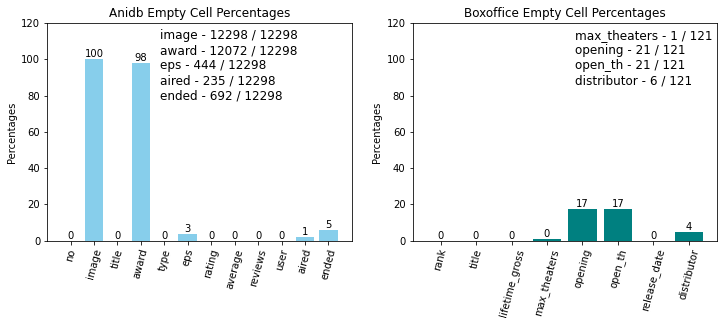

In [95]:
# plot empty columns of datasets
plotEmpty(["Anidb", "Boxoffice"], df_anidb, df_boxof)

### 4.1) Drop Empty Columns
Drop the columns *Image* and *Award* from **Anidb** since they have zero/nearly zero non-null cells. Also drop the *Rank* from **Boxoffice** and *No* from **Anidb** since these columns have no significant importance considering the other columns and are a basic result of ordering depending on *Title* and *Lifetime Gross* columns from **Anidb** and **Boxoffice** respectively.

In [96]:
# drop emtpy and unnecessary columns, perform operation inplace without creating copies
df_anidb.drop(columns=['image', 'award', 'no'], inplace=True)
df_boxof.drop(columns=['rank'], inplace=True)

In such case, tresholds can be used as well.

In [ ]:
# threshold = 0.7
# drop columns with missing value rate higher than threshold
# df_anidb = df_anidb[df_anidb.columns[df_anidb.isnull().mean() < threshold]]

# drop rows with missing value rate higher than threshold
# df_anidb = df_anidb.loc[df_anidb.isnull().mean(axis=1) < threshold]

### 4.2) Numerical Imputation

We may now fill NaN values with column specific solutions. 

In [97]:
# fill missing values of numerical column cells with medians of the columns
df_boxof = df_boxof.fillna(df_boxof.median(numeric_only=True))

# recheck the previous samples
df_boxof.loc[96:101]

,title,lifetime_gross,max_theaters,opening,open_th,release_date,distributor
96,Digimon Adventure tri. Part 4: Loss,"$59,114",410.0,NaN,39.5,"Feb 1, 2018",Fathom Events
97,Wings of Honneamise,"$55,572",211.5,NaN,39.5,"Mar 10, 1995",Tara Releasing
98,Digimon Adventure tri. Part 6: Future,"$54,324",463.0,NaN,39.5,"Sep 20, 2018",Fathom Events
99,Digimon Adventure tri. Part 5: Coexistence,"$52,339",393.0,NaN,39.5,"May 10, 2018",Fathom Events
100,Tales from Earthsea,"$48,658",5.0,"$20,614",5.0,"Aug 13, 2010",Walt Disney Studios Motion Pictures
101,Napping Princess,"$48,198",22.0,"$10,865",14.0,"Sep 8, 2017",GKIDS


In [98]:
# Check locations for empty cells to view: np.where(df_anidb.isnull())
# fill missing values of numerical column cells with medians of the columns
df_anidb = df_anidb.fillna(df_anidb.median(numeric_only=True))

# recheck the previous samples
df_anidb.loc[4702:4706]

,title,type,eps,rating,average,reviews,user,aired,ended
4702,Isekai Meikyuu de Harem o,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,??.07.2022,NaN
4703,Isekai no Seikishi Monogatari,OVA,13.0,7.45 (2587),7.84 (2616),7.08 (2),6387,20.03.2009,19.03.2010
4704,Isekai Nonbiri Nouka,unknown,4.0,N/A (0),N/A (0),N/A (0),0,NaN,NaN
4705,Isekai Ojisan,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,??.07.2022,NaN
4706,Isekai One Turn Kill Nee-san: Ane Douhan no Is...,unknown,4.0,N/A (0),N/A (0),N/A (0),0,NaN,NaN


### 4.3) Categorical Imputation
Even though there are too many different price values, we may use the maximum occured valuefor missing text data.

In [99]:
# max fill for categorical columns
df_anidb.aired.fillna(df_anidb.aired.value_counts().idxmax(), inplace=True)
df_anidb.ended.fillna(df_anidb.ended.value_counts().idxmax(), inplace=True)
df_boxof.opening.fillna(df_boxof.opening.value_counts().idxmax(), inplace=True)
df_boxof.distributor.fillna(df_boxof.distributor.value_counts().idxmax(), inplace=True)

We also see that, there are some *unknown* entries for type column of **Anidb** data which we will convert to NaN and assign the max occured category as a categorical imputation.

In [100]:
# replace entries with dash as NaN
df_anidb.replace('unknown', np.NaN, inplace=True)

# recheck the previous samples
df_anidb.loc[4702:4706]

,title,type,eps,rating,average,reviews,user,aired,ended
4702,Isekai Meikyuu de Harem o,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,??.07.2022,??.??.2022
4703,Isekai no Seikishi Monogatari,OVA,13.0,7.45 (2587),7.84 (2616),7.08 (2),6387,20.03.2009,19.03.2010
4704,Isekai Nonbiri Nouka,NaN,4.0,N/A (0),N/A (0),N/A (0),0,??.??.2022,??.??.2022
4705,Isekai Ojisan,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,??.07.2022,??.??.2022
4706,Isekai One Turn Kill Nee-san: Ane Douhan no Is...,NaN,4.0,N/A (0),N/A (0),N/A (0),0,??.??.2022,??.??.2022


In [101]:
# max fill for categorical column
df_anidb.type.fillna(df_anidb.type.value_counts().idxmax(), inplace=True)

After completing the imputation, check for the remaining empty cells.

In [102]:
# check if there are any empty entries left
print("Anidb:", np.sum(df_anidb.isnull().to_numpy()), "empty entries.")
print("Boxoffice:", np.sum(df_boxof.isnull().to_numpy()), "empty entries.")

Anidb: 0 empty entries.
Boxoffice: 0 empty entries.


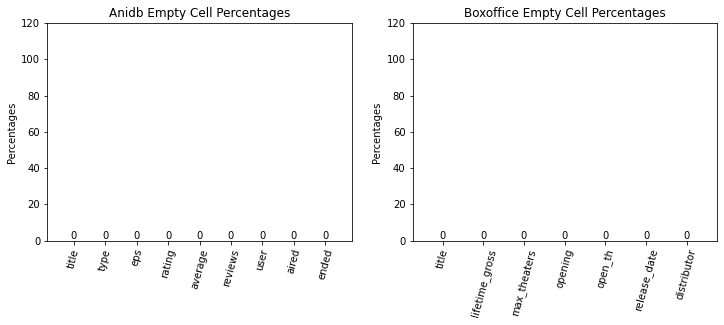

In [103]:
# confirm with plots
plotEmpty(["Anidb", "Boxoffice"], df_anidb, df_boxof)

In [104]:
# create a function for side by side printing of dataframes
def print_stacked(names, *dfs):
    stacked = ""
    for idx, df in enumerate(dfs):
        stacked += df.style.set_table_attributes("style='display:inline'").set_caption(names[idx])._repr_html_() + "&nbsp;"*10
    display_html(stacked, raw=True)

# observe numerical columns description of both tables
print_stacked(["Anidb", "Boxoffice"], df_anidb.describe(), df_boxof.describe())

,eps,user
count,12298.000000,12298.000000
mean,15.123923,1329.497723
std,47.218680,2586.324234
min,1.000000,0.000000
25%,1.000000,52.000000
50%,4.000000,279.000000
75%,13.000000,1427.000000
max,1818.000000,31991.000000
,max_theaters,open_th
count,121.000000,121.000000


### 4.4) Missing Date Values
There are some missing day and month values which is shown as ??, we will replace them with 01.

In [105]:
# observe some sample entries with ??
df_anidb.loc[4702:4706]

,title,type,eps,rating,average,reviews,user,aired,ended
4702,Isekai Meikyuu de Harem o,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,??.07.2022,??.??.2022
4703,Isekai no Seikishi Monogatari,OVA,13.0,7.45 (2587),7.84 (2616),7.08 (2),6387,20.03.2009,19.03.2010
4704,Isekai Nonbiri Nouka,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,??.??.2022,??.??.2022
4705,Isekai Ojisan,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,??.07.2022,??.??.2022
4706,Isekai One Turn Kill Nee-san: Ane Douhan no Is...,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,??.??.2022,??.??.2022


In [106]:
# Check the amount of missing year content for aired and ended columns
print("Total missing years in \"aired\":", df_anidb.aired.str.contains('????', regex=False).sum(), \
      "\nTotal missing years in \"ended\":", df_anidb.ended.str.contains('????', regex=False).sum())

Total missing years in "aired": 0 
Total missing years in "ended": 0


In [107]:
# replace entries with 01
df_anidb.replace(r"\?{2}", "01", regex=True, inplace=True)

df_anidb.loc[4702:4706]

,title,type,eps,rating,average,reviews,user,aired,ended
4702,Isekai Meikyuu de Harem o,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,01.07.2022,01.01.2022
4703,Isekai no Seikishi Monogatari,OVA,13.0,7.45 (2587),7.84 (2616),7.08 (2),6387,20.03.2009,19.03.2010
4704,Isekai Nonbiri Nouka,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,01.01.2022,01.01.2022
4705,Isekai Ojisan,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,01.07.2022,01.01.2022
4706,Isekai One Turn Kill Nee-san: Ane Douhan no Is...,TV Series,4.0,N/A (0),N/A (0),N/A (0),0,01.01.2022,01.01.2022


## 5) Extract Date
Extract the date information from strings given in various formats in both data.

In [108]:
# transform not unique date string of the data into datetime form
df_anidb.aired = pd.to_datetime(df_anidb.aired)
df_anidb.ended = pd.to_datetime(df_anidb.ended)
df_boxof.release_date = pd.to_datetime(df_boxof.release_date)

In [109]:
# additional columns for anidb data
# extract the year in a new column 'aired_year'
df_anidb.insert(loc=(df_anidb.columns.get_loc('aired')),
                        column='aired_year', 
                        value=df_anidb.aired.dt.year)

# extract the month in a new column 'aired_month'
df_anidb.insert(loc=(df_anidb.columns.get_loc('aired')),
                        column='aired_month', 
                        value=df_anidb.aired.dt.month)

# extract the day in a new column 'aired_day'
df_anidb.insert(loc=(df_anidb.columns.get_loc('aired')),
                        column='aired_day', 
                        value=df_anidb.aired.dt.day)

# extract the day name in a new column 'aired_weekday'
df_anidb.insert(loc=(df_anidb.columns.get_loc('aired')),
                        column='aired_weekday', 
                        value=df_anidb.aired.dt.day_name())

# extract the year in a new column 'ended_year'
df_anidb.insert(loc=(df_anidb.columns.get_loc('ended')),
                        column='ended_year', 
                        value=df_anidb.ended.dt.year)

# extract the month in a new column 'ended_month'
df_anidb.insert(loc=(df_anidb.columns.get_loc('ended')),
                        column='ended_month', 
                        value=df_anidb.ended.dt.month)

# extract the day in a new column 'ended_day'
df_anidb.insert(loc=(df_anidb.columns.get_loc('ended')),
                        column='ended_day', 
                        value=df_anidb.ended.dt.day)

# extract the day name in a new column 'ended_weekday'
df_anidb.insert(loc=(df_anidb.columns.get_loc('ended')),
                        column='ended_weekday', 
                        value=df_anidb.ended.dt.day_name())

In [110]:
# observe generated columns with datatime content (list of col vals to get the list of related column names)
df_anidb.loc[:,list(df_anidb.columns.values)[7:17]].head()

,aired_year,aired_month,aired_day,aired_weekday,aired,ended_year,ended_month,ended_day,ended_weekday,ended
0,1932,1,1,Friday,1932-01-01,1932,1,1,Friday,1932-01-01
1,2007,1,7,Sunday,2007-01-07,2007,1,7,Sunday,2007-01-07
2,2007,12,22,Saturday,2007-12-22,2007,12,22,Saturday,2007-12-22
3,2003,11,16,Sunday,2003-11-16,2003,11,16,Sunday,2003-11-16
4,2002,6,20,Thursday,2002-06-20,2003,10,4,Saturday,2003-10-04


In [111]:
# additional columns for boxof data
# extract the year in a new column 'release_year'
df_boxof.insert(loc=(df_boxof.columns.get_loc('release_date')),
                        column='release_year', 
                        value=df_boxof.release_date.dt.year)

# extract the month in a new column 'release_month'
df_boxof.insert(loc=(df_boxof.columns.get_loc('release_date')),
                        column='release_month', 
                        value=df_boxof.release_date.dt.month)

# extract the day in a new column 'release_day'
df_boxof.insert(loc=(df_boxof.columns.get_loc('release_date')),
                        column='release_day', 
                        value=df_boxof.release_date.dt.day)

# extract the day name in a new column 'release_weekday'
df_boxof.insert(loc=(df_boxof.columns.get_loc('release_date')),
                        column='release_weekday', 
                        value=df_boxof.release_date.dt.day_name())

In [112]:
# observe generated columns with datatime content (list of col vals to get the list of related column names)
df_boxof.loc[:,list(df_boxof.columns.values)[5:10]].head()

,release_year,release_month,release_day,release_weekday,release_date
0,1999,11,10,Wednesday,1999-11-10
1,2021,4,23,Friday,2021-04-23
2,2000,7,21,Friday,2000-07-21
3,2019,1,16,Wednesday,2019-01-16
4,2004,8,13,Friday,2004-08-13


## 6) Feature Split
Split the columns with multiple meaningful contents into separate columns.

* **Price:** All price information in **Boxoffice** set include a numeric value and the currency sign. Thus, we will remove the currency sign and set the price information as float. 

In [113]:
# precheck of some samples
df_boxof.loc[97:101]

,title,lifetime_gross,max_theaters,opening,open_th,release_year,release_month,release_day,release_weekday,release_date,distributor
97,Wings of Honneamise,"$55,572",211.5,"$288,095",39.5,1995,3,10,Friday,1995-03-10,Tara Releasing
98,Digimon Adventure tri. Part 6: Future,"$54,324",463.0,"$288,095",39.5,2018,9,20,Thursday,2018-09-20,Fathom Events
99,Digimon Adventure tri. Part 5: Coexistence,"$52,339",393.0,"$288,095",39.5,2018,5,10,Thursday,2018-05-10,Fathom Events
100,Tales from Earthsea,"$48,658",5.0,"$20,614",5.0,2010,8,13,Friday,2010-08-13,Walt Disney Studios Motion Pictures
101,Napping Princess,"$48,198",22.0,"$10,865",14.0,2017,9,8,Friday,2017-09-08,GKIDS


In [114]:
# confirm if all currency are the same ($)
print("\nTotal $ in \"lifetime_gross\":", df_boxof.lifetime_gross.str.contains('$', regex=False).sum(),"/",len(df_boxof.lifetime_gross), \
      "\nTotal $ in \"opening\":", df_boxof.opening.str.contains('$', regex=False).sum(),"/",len(df_boxof.opening))


Total $ in "lifetime_gross": 121 / 121 
Total $ in "opening": 121 / 121


In [115]:
# split columns with the currency sign by expanding into cols, take the filled second
df_boxof.lifetime_gross = df_boxof.lifetime_gross.str.split('$', expand=True)[1]
df_boxof.opening = df_boxof.opening.str.split('$', expand=True)[1]

# confirm if any currency sign ($) left
print("\nTotal $ in \"lifetime_gross\":", df_boxof.lifetime_gross.str.contains('$', regex=False).sum(),"/",len(df_boxof.lifetime_gross), \
      "\nTotal $ in \"opening\":", df_boxof.opening.str.contains('$', regex=False).sum(),"/",len(df_boxof.opening))


Total $ in "lifetime_gross": 0 / 121 
Total $ in "opening": 0 / 121


In [116]:
# confirm if the price string has any dot (.) as decimal separator
print("\nTotal . in \"lifetime_gross\":", df_boxof.lifetime_gross.str.contains('.', regex=False).sum(),"/",len(df_boxof.lifetime_gross), \
      "\nTotal . in \"opening\":", df_boxof.opening.str.contains('.', regex=False).sum(),"/",len(df_boxof.opening))


Total . in "lifetime_gross": 0 / 121 
Total . in "opening": 0 / 121


In [136]:
# since there are only comma (,) we may remove them and convert the column to float
df_boxof.lifetime_gross.replace(r",", "", regex=True, inplace=True)
df_boxof.lifetime_gross = df_boxof.lifetime_gross.astype(float)
df_boxof.opening.replace(r",", "", regex=True, inplace=True)
df_boxof.opening = df_boxof.opening.astype(float)

# check the final samples
df_boxof.loc[97:101]

,title,lifetime_gross,max_theaters,opening,open_th,release_year,release_month,release_day,release_weekday,release_date,distributor
97,Wings of Honneamise,55572.0,211.5,288095.0,39.5,1995,3,10,Friday,1995-03-10,Tara Releasing
98,Digimon Adventure tri. Part 6: Future,54324.0,463.0,288095.0,39.5,2018,9,20,Thursday,2018-09-20,Fathom Events
99,Digimon Adventure tri. Part 5: Coexistence,52339.0,393.0,288095.0,39.5,2018,5,10,Thursday,2018-05-10,Fathom Events
100,Tales from Earthsea,48658.0,5.0,20614.0,5.0,2010,8,13,Friday,2010-08-13,Walt Disney Studios Motion Pictures
101,Napping Princess,48198.0,22.0,10865.0,14.0,2017,9,8,Friday,2017-09-08,GKIDS


In [180]:
# check column types
df_boxof.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            121 non-null    object        
 1   lifetime_gross   121 non-null    float64       
 2   max_theaters     121 non-null    float64       
 3   opening          121 non-null    float64       
 4   open_th          121 non-null    float64       
 5   release_year     121 non-null    int64         
 6   release_month    121 non-null    int64         
 7   release_day      121 non-null    int64         
 8   release_weekday  121 non-null    object        
 9   release_date     121 non-null    datetime64[ns]
 10  distributor      121 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 10.5+ KB


- **Ratings:** There are three rating columns on **Anidb** set which includes rater number and average rating per column to be splitted into two columns.

In [165]:
# precheck of some samples with only relevant columns
df_anidb.iloc[4701:4706, :6]

,title,type,eps,rating,average,reviews
4701,Isekai Maou to Shoukan Shoujo no Dorei Majutsu...,TV Series,10.0,3.65 (737),6.07 (741),N/A (0)
4702,Isekai Meikyuu de Harem o,TV Series,4.0,N/A (0),N/A (0),N/A (0)
4703,Isekai no Seikishi Monogatari,OVA,13.0,7.45 (2587),7.84 (2616),7.08 (2)
4704,Isekai Nonbiri Nouka,TV Series,4.0,N/A (0),N/A (0),N/A (0)
4705,Isekai Ojisan,TV Series,4.0,N/A (0),N/A (0),N/A (0)


In [162]:
# check the initial number of N/A's in each rating column
print("\nTotal N/A in \"rating\":", df_anidb.rating.str.contains('N/A', regex=False).sum(),"/",len(df_anidb.rating), \
      "\nTotal N/A in \"average\":", df_anidb.average.str.contains('N/A', regex=False).sum(),"/",len(df_anidb.average), \
      "\nTotal N/A in \"reviews\":", df_anidb.reviews.str.contains('N/A', regex=False).sum(),"/",len(df_anidb.reviews))


Total N/A in "rating": 2999 / 12298 
Total N/A in "average": 2989 / 12298 
Total N/A in "reviews": 9627 / 12298


In [174]:
# split each column and keep contents in separate two related columns, fill NaN with 0 where necessary
temp_rate = df_anidb.rating.str.split(r"(\d*\.*\d*)\s\((\d+)\)", expand=True)
temp_avg = df_anidb.average.str.split(r"(\d*\.*\d*)\s\((\d+)\)", expand=True)
temp_rev = df_anidb.reviews.str.split(r"(\d*\.*\d*)\s\((\d+)\)", expand=True)

df_anidb.insert(loc=(df_anidb.columns.get_loc('rating')), column='rating_avg', value=pd.to_numeric(temp_rate[1], errors='coerce'))
df_anidb.insert(loc=(df_anidb.columns.get_loc('rating')), column='rating_amount', value=pd.to_numeric(temp_rate[2], errors='coerce'))
df_anidb.rating_avg = df_anidb.rating_avg.fillna(0)

df_anidb.insert(loc=(df_anidb.columns.get_loc('average')), column='average_avg', value=pd.to_numeric(temp_avg[1], errors='coerce'))
df_anidb.insert(loc=(df_anidb.columns.get_loc('average')), column='average_amount', value=pd.to_numeric(temp_avg[2], errors='coerce'))
df_anidb.average_avg = df_anidb.average_avg.fillna(0)

df_anidb.insert(loc=(df_anidb.columns.get_loc('reviews')), column='reviews_avg', value=pd.to_numeric(temp_rev[1], errors='coerce'))
df_anidb.insert(loc=(df_anidb.columns.get_loc('reviews')), column='reviews_amount', value=pd.to_numeric(temp_rev[2], errors='coerce'))
df_anidb.reviews_avg = df_anidb.reviews_avg.fillna(0)

In [175]:
# check the initial samples with only relevant columns
df_anidb.iloc[4701:4706, 3:12]

,rating_avg,rating_amount,rating,average_avg,average_amount,average,reviews_avg,reviews_amount,reviews
4701,3.65,737,3.65 (737),6.07,741,6.07 (741),0.00,0,N/A (0)
4702,0.00,0,N/A (0),0.00,0,N/A (0),0.00,0,N/A (0)
4703,7.45,2587,7.45 (2587),7.84,2616,7.84 (2616),7.08,2,7.08 (2)
4704,0.00,0,N/A (0),0.00,0,N/A (0),0.00,0,N/A (0)
4705,0.00,0,N/A (0),0.00,0,N/A (0),0.00,0,N/A (0)


In [179]:
# drop old columns
df_anidb.drop(columns=['rating','average','reviews'], inplace=True)
df_anidb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12298 entries, 0 to 12297
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           12298 non-null  object        
 1   type            12298 non-null  object        
 2   eps             12298 non-null  float64       
 3   rating_avg      12298 non-null  float64       
 4   rating_amount   12298 non-null  int64         
 5   average_avg     12298 non-null  float64       
 6   average_amount  12298 non-null  int64         
 7   reviews_avg     12298 non-null  float64       
 8   reviews_amount  12298 non-null  int64         
 9   user            12298 non-null  int64         
 10  aired_year      12298 non-null  int64         
 11  aired_month     12298 non-null  int64         
 12  aired_day       12298 non-null  int64         
 13  aired_weekday   12298 non-null  object        
 14  aired           12298 non-null  datetime64[ns]
 15  en

## 7) Join Data

The data sets **Anidb** and **Boxoffice** include different information for some common titles. Thus, we will match the titles for existing entries in both sets and obtain a final set with all the combined information. To do so, we will use an offline database for name synonyms and apply Jaro string similarity metric for additional matching. The database JSON file *'anime-offline-database.json'* can be obtained from [manami-project](https://github.com/manami-project/anime-offline-database)

In [248]:
# opening the JSON file for name synonym comparisons
with open('anime-offline-database.json', encoding='utf-8') as json_file:
    data = json.load(json_file)

titles = dict()
# create a dict of title and synonyms for each anime
for anime in data["data"]:
    titles[anime["title"]] = anime["synonyms"]

# see a sample from the existing ones in df_anidb
print(titles["Sen to Chihiro no Kamikakushi"])

['A Viagem de Chihiro', 'Avanture male Chihiro', 'Cesta do fantazie', 'Cesta do fantázie', 'Chihiro', 'Chihiro Og Heksene', 'Chihiro Szellemországban', 'Chihiros Reise ins Zauberland', 'Călătoria lui Chihiro', 'De reis van Chihiro', 'El Viaje de Chihiro', 'El viaje de Chihiro', 'Gariem līdzi', 'Henkien kätkemä', 'La Città Incantata', 'La città incantata', 'Le Voyage de Chihiro', 'Le voyage de Chihiro', 'Ruhların Kaçışı', 'SA', "Sen and Chihiro's Spiriting Away", 'Sen and Chihiro`s Spiriting Away', 'Sen to Chihiro', 'Spirited Away', 'Spirited Away: W krainie bogów', 'StCnK', 'Stebuklingi Šihiros nuotykiai Dvasių pasaulyje', 'Vaimudest viidud', 'Vùng đất linh hồn', 'W Krainie Bogów', 'W krainie Bogów', 'Začarani grad', 'Čudežno potovanje', 'Ταξίδι στη Χώρα των Θαυμάτων', 'Отнесени от Духове', 'Сен та Чіхіро', 'Сен та Чіхіро в полоні у духів', 'Унесённые призраками', 'המסע המופלא', 'شيهيرو', 'せんとちひろのかみかくし', '千と千尋の神隠し', '千与千寻', '千與千尋', '센과 치히로의 행방불명']


In [183]:
# create a copy to do not alter the original data
temp = df_anidb[['title','aired_year']].copy()

# drop duplicates of titles in case any --> unnecessary, can be removed
temp = temp.drop_duplicates(subset=['title'])
unique_titles = temp['title'].tolist()
unique_titles_aired = temp['aired_year'].tolist()

# print sorted unique titles
temp.sort_values(by=['title'], ascending=True)

,title,aired_year
10,"""0""",2013
11,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",1970
12,"""Anata o Hitokoto de Arawashite Kudasai"" no Sh...",2022
13,"""Eiji""",1990
14,"""Eikou Naki Tensai-tachi"" kara no Monogatari",2017
...,...,...
11389,vivi,2012
11746,xxxHOLiC,2006
11747,xxxHOLiC Rou,2010
11748,xxxHOLiC Shunmuki,2009


In [258]:
# similarly create a copy of boxof set to do not alter the original data
temp_b = df_boxof[['title','release_year']].copy()

# drop duplicates of titles in case any --> unnecessary, can be removed
temp_b = temp_b.drop_duplicates(subset=['title'])
unique_titles_b = temp_b['title'].tolist()
unique_titles_b_release = temp_b['release_year'].tolist()

# print sorted unique titles
temp_b.sort_values(by=['title'], ascending=True)

,title,release_year
94,A Letter to Momo,2014
58,A Silent Voice: The Movie,2019
53,Akira,1989
85,Anohana the Movie: The Flower We Saw That Day ...,2014
83,Appleseed,2005
...,...,...
78,X,2000
63,"Yo-kai Watch Movie: It's the Secret of Birth, ...",2016
16,Your Name.,2017
26,Yu-Gi-Oh!: The Dark Side of Dimensions,2017


In [ ]:
# use the line below to load the library for string comparison 
#!pip install python-Levenshtein

In [207]:
# example usage of jaro string similarity
from Levenshtein import jaro
jaro('xxxHOLiC', 'xxxHOLiC Rou')

0.8888888888888888

In [287]:
# create a dictionary to keep matching titles - METHOD1: Found 39, cn be tried for lower string match scores!
matches = dict()
counter = 1

# loop over the title lists ---> TODO: VERY INEFFICIENT, takes TOO long (>1 hour), will be updated later
for ani_item in unique_titles:
    for box_item in unique_titles_b:
        # get years of checked pair
        ani_year = temp[temp.title == ani_item].aired_year.values[0]
        box_year = temp_b[temp_b.title == box_item].release_year.values[0]
        
        if (ani_item in titles and box_item in titles[ani_item]) \ # if the match is in offline synonyms list
        or (box_item in ani_item and jaro(box_item, ani_item)>0.8 and ani_year==box_year): # compare by string similarity
            matches[box_item] = ani_item
        counter += 1
            
        print("Pair checked: " + str(counter) + "/" + str(len(unique_titles)*len(unique_titles_b)), end='\r')

pprint.pprint(matches)

{'A Letter to Momo': 'Momo e no Tegami',
 'Akira': 'Akira (Shin Anime)',
 'Boruto: Naruto The Movie': 'Boruto: Naruto the Movie',
 'Castle in the Sky': 'Tenkuu no Shiro Laputa',
 'Cowboy Bebop: The Movie': 'Cowboy Bebop: Tengoku no Tobira',
 'Digimon: The Movie': 'Digimon Adventure: Bokura no War Game!',
 'Escaflowne: The Movie': 'Escaflowne',
 'Fireworks': 'Uchiage Hanabi, Shita kara Miru ka? Yoko kara Miru ka?',
 'From Up on Poppy Hill': 'Coquelicot-zaka kara',
 'Ghost in the Shell 2: Innocence': 'Innocence',
 'Grave of the Fireflies': 'Hotaru no Haka',
 'Haikara-San: Here Comes Miss Modern': 'Gekijouban Haikara-san ga Tooru',
 "Howl's Moving Castle": 'Howl no Ugoku Shiro',
 'Jin-Roh: The Wolf Brigade': 'Jin-Rou',
 'Love Live! The School Idol Movie': 'Love Live! The School Idol Movie',
 "Mary and the Witch's Flower": 'Mary to Majo no Hana',
 'Millennium Actress': 'Sennen Joyuu',
 'Mirai': 'Mirai no Mirai',
 'Miss Hokusai': 'Sarusuberi: Miss Hokusai',
 'Ocean Waves': 'Umi ga Kikoeru',

In [294]:
# create a dictionary to keep matching titles - METHOD2: Found 37, cn be tried for lower string match scores!
matches2 = dict()
counter = 1

# loop over the title lists ---> Works much faster (seconds)
for ani_item in unique_titles:
    for box_item in unique_titles_b:
        if (ani_item in titles and box_item in titles[ani_item]):
            matches2[box_item] = ani_item
            print("Last match: " + str(counter) + "/" + str(len(unique_titles)*len(unique_titles_b)), end='\r')
        counter += 1

len(matches2)

37

In [314]:
# filter dataframes for only matching titles
df_a_part = df_anidb[df_anidb.title.isin(list(matches.values()))]
df_b_part = df_boxof[df_boxof.title.isin(list(matches.keys()))]

# check if they have the same number of lines
print(len(df_a_part), len(df_b_part))

39 39


In [315]:
# add original names from matches as a new column to boxoffice part
df_b_part.insert(loc=(df_b_part.columns.get_loc('title')),
                        column='title_orig', 
                        value=df_b_part.title.map(matches))
df_a_part = df_a_part.rename(columns={"title": "title_orig"})

# merge two tables using the new column
result = pd.merge(df_b_part, df_a_part, on="title_orig")

In [316]:
# observe the final table information
result.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title_orig       39 non-null     object        
 1   title            39 non-null     object        
 2   lifetime_gross   39 non-null     float64       
 3   max_theaters     39 non-null     float64       
 4   opening          39 non-null     float64       
 5   open_th          39 non-null     float64       
 6   release_year     39 non-null     int64         
 7   release_month    39 non-null     int64         
 8   release_day      39 non-null     int64         
 9   release_weekday  39 non-null     object        
 10  release_date     39 non-null     datetime64[ns]
 11  distributor      39 non-null     object        
 12  type             39 non-null     object        
 13  eps              39 non-null     float64       
 14  rating_avg       39 non-null     float64    

In [318]:
# show results ordered by lifetime gross
result.sort_values(by=['lifetime_gross'], ascending=False)

,title_orig,title,lifetime_gross,max_theaters,opening,open_th,release_year,release_month,release_day,release_weekday,...,aired_year,aired_month,aired_day,aired_weekday,aired,ended_year,ended_month,ended_day,ended_weekday,ended
0,Karigurashi no Arrietty,The Secret World of Arrietty,19202743.0,1522.0,6446395.0,1522.0,2012,2,17,Friday,...,2010,7,17,Saturday,2010-07-17,2010,7,17,Saturday,2010-07-17
1,Gake no Ue no Ponyo,Ponyo,15090399.0,927.0,3585852.0,927.0,2009,8,14,Friday,...,2008,7,19,Saturday,2008-07-19,2008,7,19,Saturday,2008-07-19
2,Sen to Chihiro no Kamikakushi,Spirited Away,10055859.0,714.0,449839.0,26.0,2002,9,20,Friday,...,2001,7,20,Friday,2001-07-20,2001,7,20,Friday,2001-07-20
3,Digimon Adventure: Bokura no War Game!,Digimon: The Movie,9631153.0,1825.0,4233304.0,1823.0,2000,10,6,Friday,...,2000,4,3,Monday,2000-04-03,2000,4,3,Monday,2000-04-03
4,Tenki no Ko,Weathering with You,8056636.0,1020.0,1808533.0,486.0,2020,1,15,Wednesday,...,2019,7,19,Friday,2019-07-19,2019,7,19,Friday,2019-07-19
5,Kaze Tachinu,The Wind Rises,5209580.0,496.0,313751.0,21.0,2014,2,21,Friday,...,2013,7,20,Saturday,2013-07-20,2013,7,20,Saturday,2013-07-20
6,Kimi no Na wa.,Your Name.,5017246.0,311.0,1813781.0,311.0,2017,4,7,Friday,...,2016,3,7,Monday,2016-03-07,2016,3,7,Monday,2016-03-07
7,Howl no Ugoku Shiro,Howl's Moving Castle,4711096.0,202.0,427987.0,36.0,2005,6,10,Friday,...,2004,11,20,Saturday,2004-11-20,2004,11,20,Saturday,2004-11-20
8,Promare,Promare,2529324.0,701.0,109085.0,54.0,2019,9,17,Tuesday,...,2019,5,24,Friday,2019-05-24,2019,5,24,Friday,2019-05-24
9,Mary to Majo no Hana,Mary and the Witch's Flower,2418404.0,573.0,348475.0,161.0,2018,1,18,Thursday,...,2017,8,7,Monday,2017-08-07,2017,8,7,Monday,2017-08-07


In [329]:
# show compact results ordered by lifetime gross
idxs = list(range(0,31))
removes = [4,5,6,7,8,9,14,15,18,19,21,22,23,24,26,27,28,29]
idxs = list(set(idxs) - set(removes))

df_compact = result.iloc[:,idxs].sort_values(by=['lifetime_gross'], ascending=False)
df_compact = df_compact.rename(columns={"average_avg": "rating", "average_amount": "votes"})
df_compact

,title_orig,title,lifetime_gross,max_theaters,release_date,distributor,type,eps,rating,votes,user,aired,ended
0,Karigurashi no Arrietty,The Secret World of Arrietty,19202743.0,1522.0,2012-02-17,Walt Disney Studios Motion Pictures,Movie,1.0,7.96,3578,6903,2010-07-17,2010-07-17
1,Gake no Ue no Ponyo,Ponyo,15090399.0,927.0,2009-08-14,Walt Disney Studios Motion Pictures,Movie,1.0,7.54,3859,7540,2008-07-19,2008-07-19
2,Sen to Chihiro no Kamikakushi,Spirited Away,10055859.0,714.0,2002-09-20,Walt Disney Studios Motion Pictures,Movie,1.0,8.53,14182,20756,2001-07-20,2001-07-20
3,Digimon Adventure: Bokura no War Game!,Digimon: The Movie,9631153.0,1825.0,2000-10-06,Twentieth Century Fox,Movie,1.0,7.02,1026,2024,2000-04-03,2000-04-03
4,Tenki no Ko,Weathering with You,8056636.0,1020.0,2020-01-15,GKIDS,Movie,1.0,7.86,1379,2857,2019-07-19,2019-07-19
5,Kaze Tachinu,The Wind Rises,5209580.0,496.0,2014-02-21,Walt Disney Studios Motion Pictures,Movie,1.0,7.81,2231,4482,2013-07-20,2013-07-20
6,Kimi no Na wa.,Your Name.,5017246.0,311.0,2017-04-07,FUNimation Entertainment,Movie,1.0,8.51,5628,8827,2016-03-07,2016-03-07
7,Howl no Ugoku Shiro,Howl's Moving Castle,4711096.0,202.0,2005-06-10,Walt Disney Studios Motion Pictures,Movie,1.0,8.26,10383,16886,2004-11-20,2004-11-20
8,Promare,Promare,2529324.0,701.0,2019-09-17,GKIDS,Movie,1.0,7.23,747,1704,2019-05-24,2019-05-24
9,Mary to Majo no Hana,Mary and the Witch's Flower,2418404.0,573.0,2018-01-18,GKIDS,Movie,1.0,6.97,601,1294,2017-08-07,2017-08-07


Since we have the final table, let's perform some analysis on it.

In [370]:
# lets check the total lifetime gross by distributor and sort it
df_plot = df_compact.groupby('distributor').lifetime_gross.sum().reset_index().sort_values(['lifetime_gross'], ascending=True)
df_plot

,distributor,lifetime_gross
10,The Bigger Picture,3259.0
8,Sony Pictures Entertainment (SPE),6000.0
9,Tara Releasing,55572.0
0,Bandai,94060.0
11,Tidepoint Pictures,94591.0
7,Miramax,746381.0
6,IDP Distribution,1000045.0
1,Dimension Films,1727447.0
2,Eleven Arts,2535121.0
4,Fathom Events,2645058.0


<AxesSubplot:ylabel='distributor'>

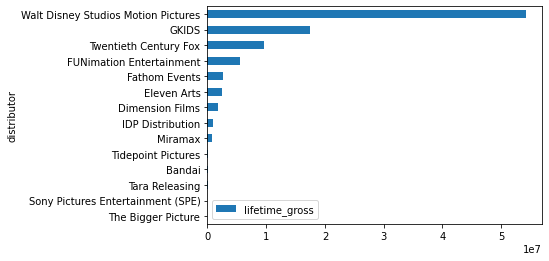

In [374]:
# plot the sorted info
df_plot.plot(kind='barh', y='lifetime_gross', x='distributor')

In [380]:
# lets check the average anime rating per distributor - this is a basic example, originally amount should be considered too?
df_line = df_compact.groupby('distributor').rating.mean().reset_index().sort_values(['rating'], ascending=True)
df_line

,distributor,rating
2,Eleven Arts,5.8200
1,Dimension Films,6.1400
8,Sony Pictures Entertainment (SPE),6.4600
7,Miramax,6.5100
10,The Bigger Picture,6.8600
0,Bandai,6.9500
12,Twentieth Century Fox,7.0200
5,GKIDS,7.2825
9,Tara Releasing,7.4700
11,Tidepoint Pictures,7.6900


[Text(0, 0, 'Eleven Arts'),
 Text(1, 0, 'Dimension Films'),
 Text(2, 0, 'Sony Pictures Entertainment (SPE)'),
 Text(3, 0, 'Miramax'),
 Text(4, 0, 'The Bigger Picture'),
 Text(5, 0, 'Bandai'),
 Text(6, 0, 'Twentieth Century Fox'),
 Text(7, 0, 'GKIDS'),
 Text(8, 0, 'Tara Releasing'),
 Text(9, 0, 'Tidepoint Pictures'),
 Text(10, 0, 'Fathom Events'),
 Text(11, 0, 'Walt Disney Studios Motion Pictures'),
 Text(12, 0, 'FUNimation Entertainment'),
 Text(13, 0, 'IDP Distribution')]

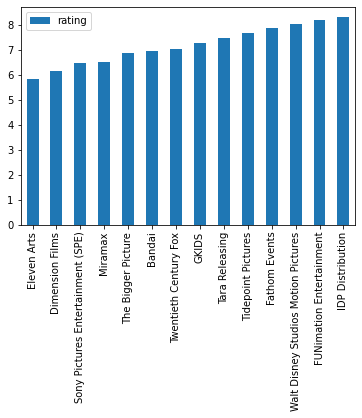

In [409]:
ax = df_line.plot.bar(ylim=0)
ax.set_xticklabels(df_line.distributor)

<AxesSubplot:xlabel='distributor'>

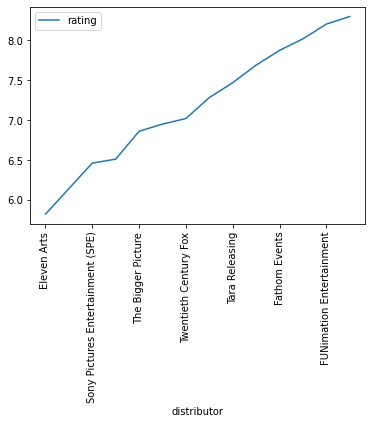

In [410]:
# plot the sorted info
df_line.plot(kind='line', y='rating', x='distributor', rot="vertical", use_index=True)

The possible analysis of comarison to describe success will be checked.